### CA2 – Statistical Techniques HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CristhianMacedo2024104/Statistical-Techniques-CA2)

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Task 1
1. Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

- a. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.
- b. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.
- c. Produce and comment on an appropriate plot to illustrate your findings.

In [2]:
task1 = pd.read_csv("Q1.csv")

In [3]:
task1.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [4]:
task1.shape

(50, 1)

In [5]:
task1.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


In [6]:
import numpy as np

print("Len: {:.2f}".format(len(task1["exam_score"])))
print("Sum: {:.2f}".format(np.sum(task1["exam_score"])))
print("Mean: {:.2f}".format(np.mean(task1["exam_score"])))
print("Median: {:.2f}".format(np.median(task1["exam_score"])))
print("Mode(s): {:.2f}".format(task1["exam_score"].mode()[0]))
print("Range: {:.2f}".format(np.max(task1["exam_score"]) - np.min(task1["exam_score"])))
print("Standard Deviation: {:.2f}".format(np.std(task1["exam_score"])))
print("Variance: {:.2f}".format(np.var(task1["exam_score"])))
print("Interquartile Range (IQR): {:.2f}".format(np.percentile(task1["exam_score"], 75) - np.percentile(task1["exam_score"], 25)))
print("Percentile 25%: {:.2f}".format(np.percentile(task1["exam_score"], 25)))
print("Percentile 50%: {:.2f}".format(np.percentile(task1["exam_score"], 50)))
print("Percentile 75%: {:.2f}".format(np.percentile(task1["exam_score"], 75)))
print("Coefficient of Variation (CV): {:.2f}".format(np.std(task1["exam_score"]) / np.mean(task1["exam_score"]) * 100))

Len: 50.00
Sum: 3436.78
Mean: 68.74
Median: 68.39
Mode(s): 48.73
Range: 38.63
Standard Deviation: 9.65
Variance: 93.16
Interquartile Range (IQR): 12.59
Percentile 25%: 62.04
Percentile 50%: 68.39
Percentile 75%: 74.63
Coefficient of Variation (CV): 14.04


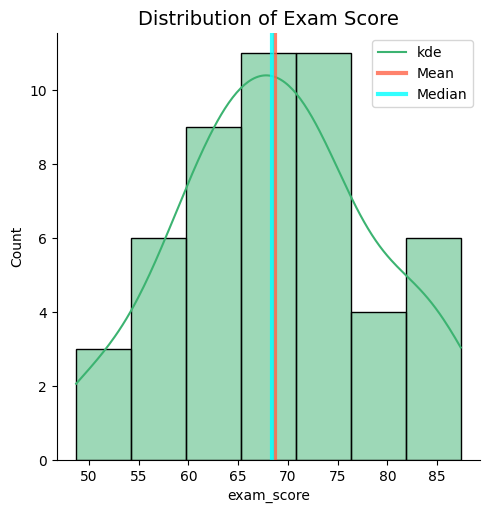

Mean: 68.74, Median: 68.39
Standard Deviation: 9.75


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(task1["exam_score"], color = "mediumseagreen", kde = True)
plt.axvline(task1["exam_score"].mean(), linewidth = 3, color = 'tomato', label = "mean", alpha = 0.8)
plt.axvline(task1["exam_score"].median(), linewidth = 3, color = 'cyan', label = "median", alpha = 0.8)
plt.title("Distribution of Exam Score", size = 14)
plt.legend(["kde", "Mean", "Median"])
plt.show()

print('Mean: {:.2f}, Median: {:.2f}'.format(task1['exam_score'].mean(), task1['exam_score'].median()))
print('Standard Deviation: {:.2f}'.format(task1['exam_score'].std()))

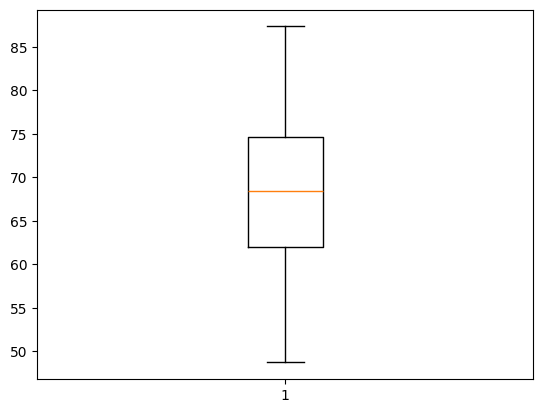

In [8]:
plt.boxplot(task1)
plt.show()

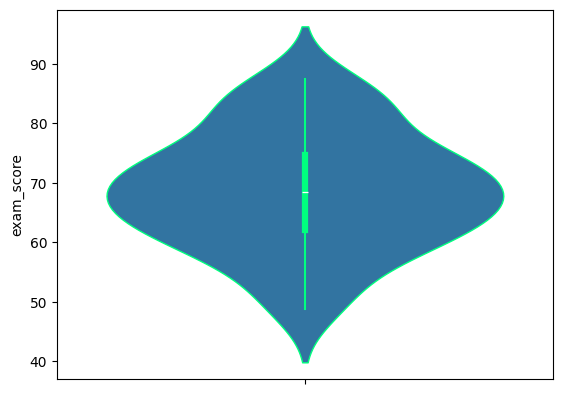

In [9]:
sns.violinplot(y = task1["exam_score"], linewidth = 1, linecolor = "springgreen")
plt.show()

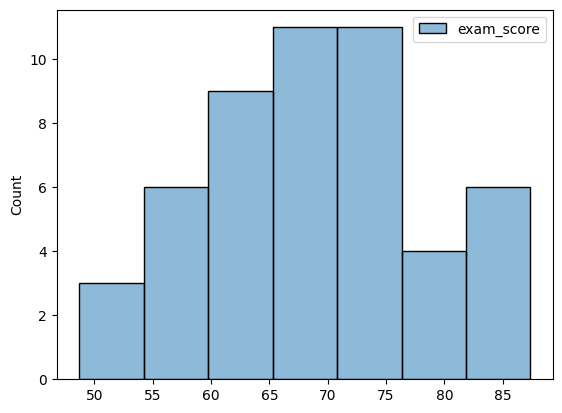

In [10]:
sns.histplot(task1)
plt.show()

In [11]:
task1["performance"] = task1["exam_score"] >= 70

In [12]:
task1.head()

,exam_score,performance
0,74.54,True
1,66.20,False
2,86.75,True
3,70.87,True
4,80.43,True


##### Verify the percentage of people up to 70% as exam score

In [13]:
task1["performance"].value_counts()

performance
False    26
True     24
Name: count, dtype: int64

In [14]:
len(task1["performance"])

50

In [15]:
task1["performance"].value_counts() / len(task1["performance"])

performance
False    0.52
True     0.48
Name: count, dtype: float64

##### Get a Classification and Grade Band and Standard: 
1. 0 – 34% Unsatisfactory (Fail)
2. 35 – 39% Limited (Fail (pass by compensation, where applicable))
3. 40 – 49% Acceptable (Pass)
4. 50 – 59% Good (Lower Second Class Honours or Merit One)
5. 60 – 69% Very Good (Upper Second Class Honours or Merit Two)
6. 70 – 79% Excellent (First Class Honours or Distinction)
7. 80 – 89% Outstanding (First Class Honours or Distinction)
8. 90 – 100% Exceptional (First Class Honours or Distinction)

https://blog.hubspot.com/website/pandas-if-else and https://www.datacamp.com/tutorial/elif-statements-python

In [16]:
classifications = []

for score in task1["exam_score"]:
    if score >= 0 and score <= 34.99:
        classification = "Unsatisfactory"
    elif score >= 35 and score <= 39.99:
        classification =  "Limited"
    elif score >= 40 and score <= 49.99:
        classification =  "Acceptable"
    elif score >= 50 and score <= 59.99:
        classification =  "Good"
    elif score >= 60 and score <= 69.99:
        classification =  "Very Good"
    elif score >= 70 and score <= 79.99:
        classification =  "Excellent"
    elif score >= 80 and score <= 89.99:
        classification =  "Outstanding"
    elif score >= 90 and score <= 100:
        classification =  "Exceptional"
    else:
        classification =  "Invalid Score"
        
    classifications.append(classification)

In [17]:
task1["Classification"] = classifications

In [18]:
task1.head()

,exam_score,performance,Classification
0,74.54,True,Excellent
1,66.20,False,Very Good
2,86.75,True,Outstanding
3,70.87,True,Excellent
4,80.43,True,Outstanding


##### Get a Classification and Grade Band and Standard: 
1. 0 – 34% Unsatisfactory (Fail)
2. 35 – 39% Limited (Fail (pass by compensation, where applicable))
3. 40 – 49% Acceptable (Pass)
4. 50 – 59% Good (Lower Second Class Honours or Merit One)
5. 60 – 69% Very Good (Upper Second Class Honours or Merit Two)
6. 70 – 79% Excellent (First Class Honours or Distinction)
7. 80 – 89% Outstanding (First Class Honours or Distinction)
8. 90 – 100% Exceptional (First Class Honours or Distinction)

In [19]:
GradeBandStandard = []

for score in task1["exam_score"]:
    if score >= 0 and score <= 34.99:
        standard = "Fail"
    elif score >= 35 and score <= 39.99:
        standard =  "Fail (pass by compensation, where applicable)"
    elif score >= 40 and score <= 49.99:
        standard =  "Pass"
    elif score >= 50 and score <= 59.99:
        standard =  "Lower Second Class Honours or Merit One"
    elif score >= 60 and score <= 69.99:
        standard =  "Upper Second Class Honours or Merit Two"
    elif score >= 70 and score <= 100:
        standard =  "First Class Honours or Distinction"
    else:
        standard =  "Invalid"
        
    GradeBandStandard.append(standard)

In [20]:
task1["Grade_Band_Standard"] = GradeBandStandard

In [21]:
task1.head(5)

,exam_score,performance,Classification,Grade_Band_Standard
0,74.54,True,Excellent,First Class Honours or Distinction
1,66.20,False,Very Good,Upper Second Class Honours or Merit Two
2,86.75,True,Outstanding,First Class Honours or Distinction
3,70.87,True,Excellent,First Class Honours or Distinction
4,80.43,True,Outstanding,First Class Honours or Distinction


In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
task1['Classification'] = encoder.fit_transform(task1['Classification'])

encoder = LabelEncoder()
task1['performance'] = encoder.fit_transform(task1['performance'])

encoder = LabelEncoder()
task1['Grade_Band_Standard'] = encoder.fit_transform(task1['Grade_Band_Standard'])

In [23]:
task1.head(5)

,exam_score,performance,Classification,Grade_Band_Standard
0,74.54,1,1,0
1,66.20,0,4,3
2,86.75,1,3,0
3,70.87,1,1,0
4,80.43,1,3,0


,exam_score,performance,Classification,Grade_Band_Standard
exam_score,1.000000,0.811684,0.015990,-0.573747
performance,0.811684,1.000000,-0.527235,-0.882508
Classification,0.015990,-0.527235,1.000000,0.715445
Grade_Band_Standard,-0.573747,-0.882508,0.715445,1.000000


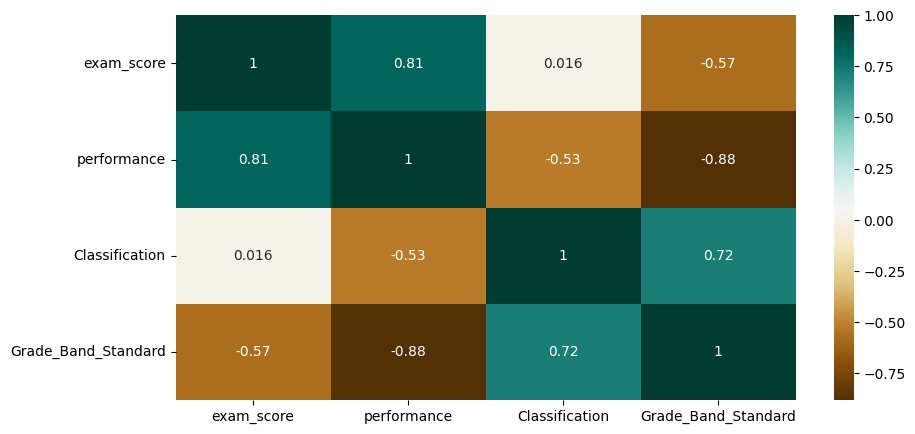

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = task1.select_dtypes(include = ['number'])

plt.figure(figsize = (10, 5))
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

exam_score
Skew: 0.01
Mean: 68.74, Median: 68.39
Standard Deviation: 9.75


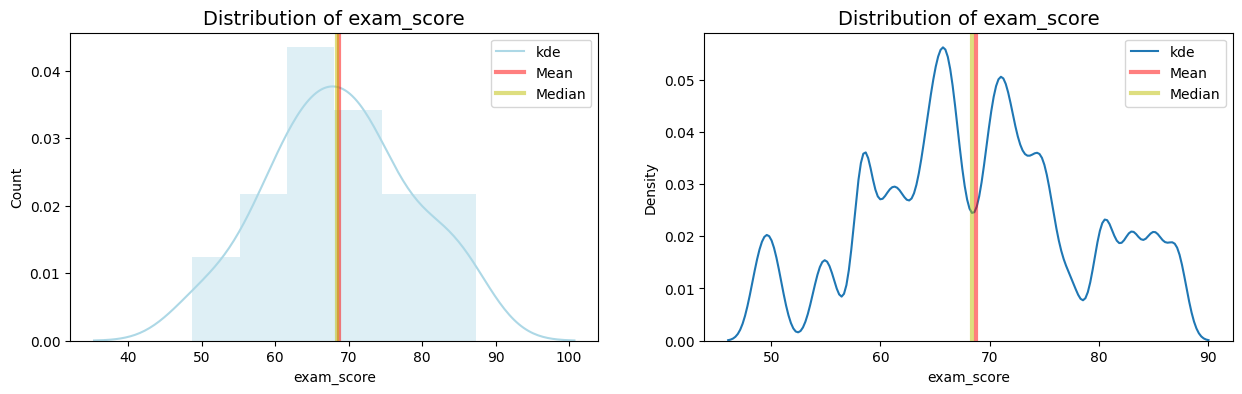

performance
Skew: 0.08
Mean: 0.48, Median: 0.00
Standard Deviation: 0.50


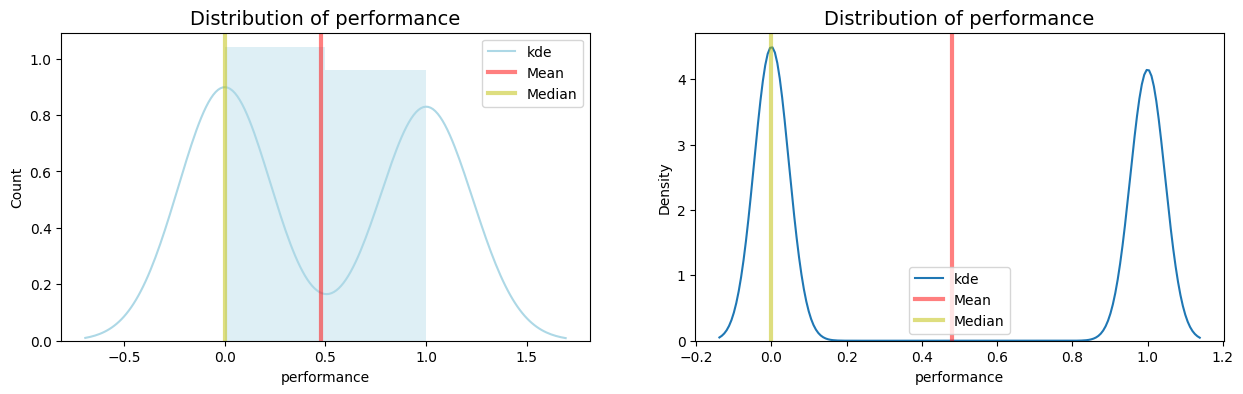

Classification
Skew: -0.17
Mean: 2.48, Median: 3.00
Standard Deviation: 1.34


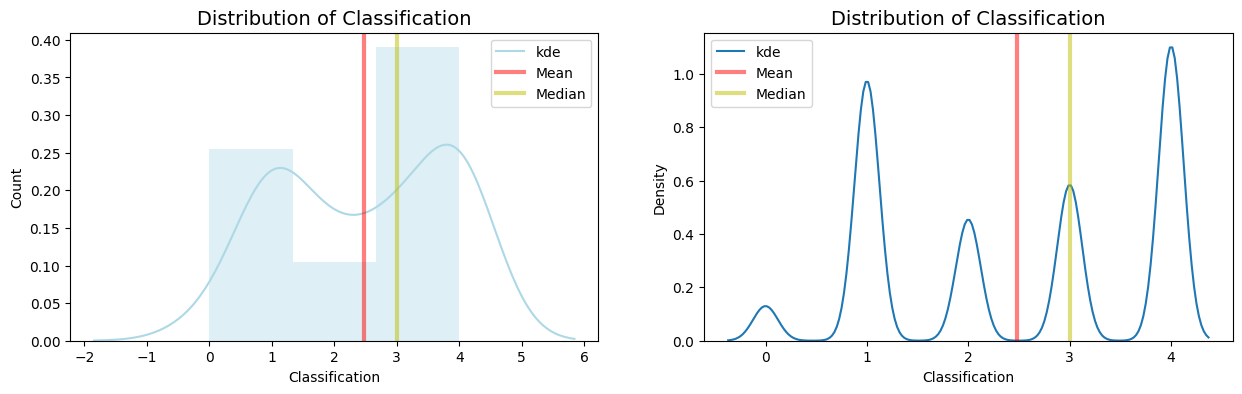

Grade_Band_Standard
Skew: 0.4
Mean: 1.24, Median: 1.00
Standard Deviation: 1.36


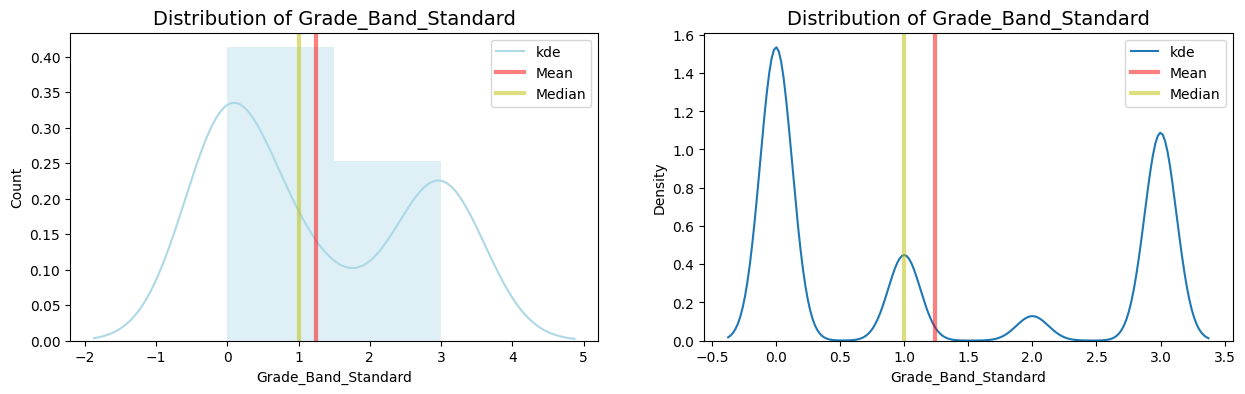

In [25]:
feature_name = task1[['exam_score', 'performance', 'Classification', 'Grade_Band_Standard']]

for col in feature_name:
    print(col)
    print('Skew:', round(task1[col].skew(), 2))
    print('Mean: {:.2f}, Median: {:.2f}'.format(task1[col].mean(), task1[col].median()))
    print('Standard Deviation: {:.2f}'.format(task1[col].std()))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(task1[col], axlabel = col, color = "lightblue");
    plt.axvline(task1[col].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
    plt.axvline(task1[col].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
    plt.title("Distribution of " + col, size = 14)
    plt.legend(["kde", "Mean", "Median"])
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.kdeplot(data = task1, x = col, bw_adjust = .2)
    plt.axvline(task1[col].mean(), linewidth = 3, color = 'r', label = "mean", alpha = 0.5)
    plt.axvline(task1[col].median(), linewidth = 3, color = 'y', label = "median", alpha = 0.5)
    plt.title("Distribution of " + col, size = 14)
    plt.legend(["kde", "Mean", "Median"])
    plt.show()

---

## Task 2

2. Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

- a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.
- b. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
- c. Produce and comment on an appropriate plot to illustrate your findings.
- d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamonds.

In [26]:
task2 = pd.read_csv("diamonds.csv")

In [27]:
task2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


---

## Task 3

3. Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment conditions.

- a. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.
- b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.
- c. If there is evidence of a difference between the three means, find and comment on where this difference may be.

In [28]:
# pip install pydataset

In [29]:
from pydataset import data

In [30]:
task3 = data('PlantGrowth')

In [31]:
task3.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


---

## Task 4
4. Load the trees dataset from the pydataset library. It contains measurements of the diameter, height and volume of timber in 31 felled black cherry trees. Note that the diameter (in inches) is labelled girth in the dataset. It is measured at 4 foot 6 inches above the ground.

- a. Perform a correlation analysis between all numerical variables. Include and comment on the results of hypothesis tests for the population correlation coefficients between all three pairs of variables (you can use the pearsonr function from the scipy.stats library).
- b. There is interest in estimating the volume of timber from trees using either the girth or the height of the trees, or both. Perform a regression analysis to decide which of the three possible models you would recommend using. Interpret your results and provide a short conclusion of your findings.

In [32]:
from pydataset import data

In [33]:
task4 = data('trees')

In [34]:
task4.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


---

### References

iamaziz (2015). PyDataset/examples/basic-usage.ipynb at master · iamaziz/PyDataset. [online] GitHub. Available at: https://github.com/iamaziz/PyDataset/blob/master/examples/basic-usage.ipynb [Accessed 1 May 2024].